# lab-cleaning-categorical

In [1]:
# For this lab, we will be using the dataset in the Customer Analysis Business Case.
# This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

## 1. Import the necessary libraries if you are starting a new notebook.

In [2]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import datetime
import warnings

In [3]:
# read the csv file
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
# Snake case (stylized as snake_case) refers to the style of writing in which each space is replaced by an underscore (_) character,
# and the first letter of each word is written in lowercase. 
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

## 2. Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [5]:
# define the function. We use the random number 350 to filter each column and to compare the number of the unique values
# with the number 350
def variable(x):
    lst_cont=[]
    lst_disc=[]
    for i in x:
        if len(x[i].unique())>350:
            lst_cont.append(i)
        else:
            lst_disc.append(i)
    return x[lst_cont], x[lst_disc] 

In [6]:
# seperating continuous, discrete 
continuous_df, discrete_df = variable(customer_df)

In [7]:
# continuous stored
continuous_df

,customer,customer_lifetime_value,income,total_claim_amount
0,BU79786,2763.519279,56274,384.811147
1,QZ44356,6979.535903,0,1131.464935
2,AI49188,12887.431650,48767,566.472247
3,WW63253,7645.861827,0,529.881344
4,HB64268,2813.692575,43836,138.130879
...,...,...,...,...
9129,LA72316,23405.987980,71941,198.234764
9130,PK87824,3096.511217,21604,379.200000
9131,TD14365,8163.890428,0,790.784983
9132,UP19263,7524.442436,21941,691.200000


In [8]:
# discrete stored
discrete_df

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


## 3. Plot a correlation matrix, what can you see?

In [9]:
# we can plot a correlation matrix only in the numerical features
df_numerical = customer_df.select_dtypes(np.number)
df_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [10]:
# to hide the repeat half of the matrix in order to hide the half heatmap
mask = np.zeros_like(df_numerical.corr())
mask
mask[np.triu_indices_from(mask)] = True 
mask

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


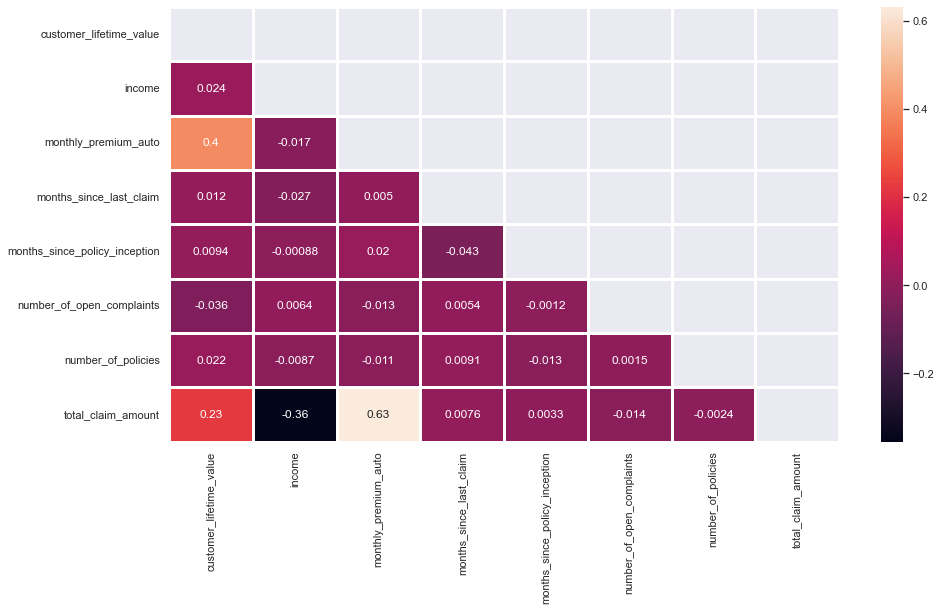

In [11]:
# We will check the multicollinearity between the features with a heatmap, where we can see for every pair their correlation
correlations_matrix = df_numerical.corr()
sns.heatmap(correlations_matrix,sns.set(rc = {'figure.figsize':(15,8)}), linecolor='white', linewidths=3, mask=mask, annot=True)
plt.show()

In [12]:
# the highest correlation 0,63 is between the features monthly_premium_auto and total_claim_amount
# the other pairs have low correlation except the pairs with medium correlation:
# monthly_premium_auto-customer_lifetime_value with correlation 0,4
# total_claim_amount-income with correlation -0,36
# customer_lifetime_value-total_claim_amount 0,23

## 4. Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

In [13]:
discrete_df1=discrete_df.drop(['effective_to_date'], axis=1)

In [14]:
# plot for discrete variables with histograms
def plot_discrete(x):
    for col in discrete_df1.columns:
        sns.histplot(discrete_df1[col], color='g', bins=2000)
        plt.show()

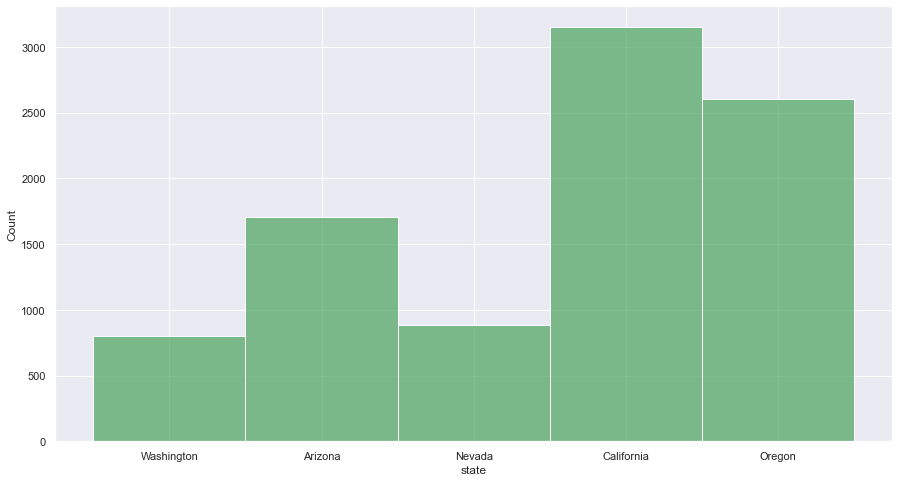

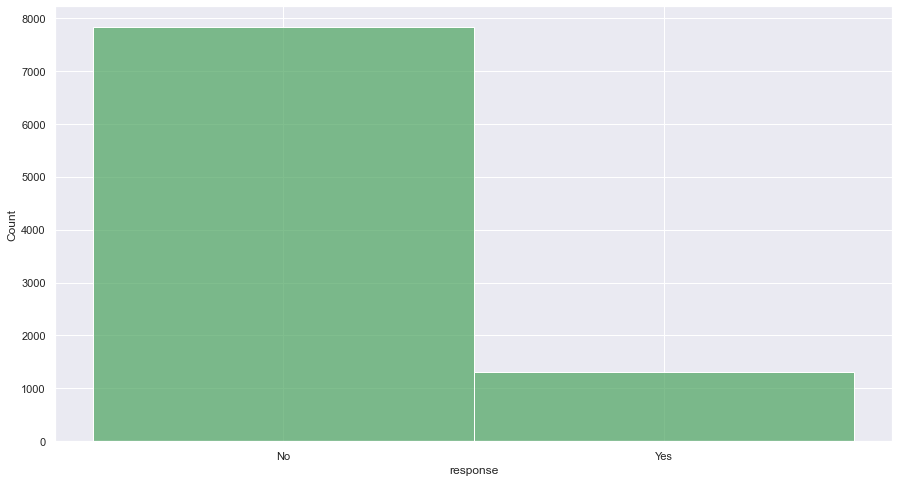

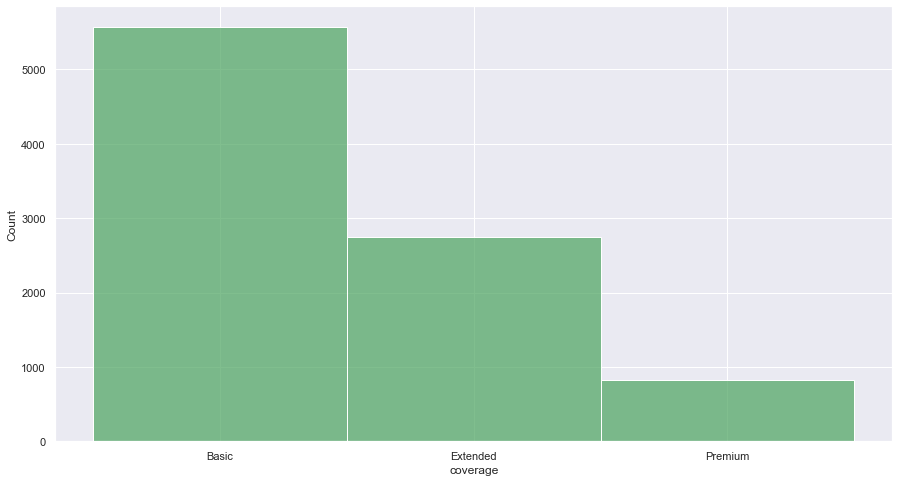

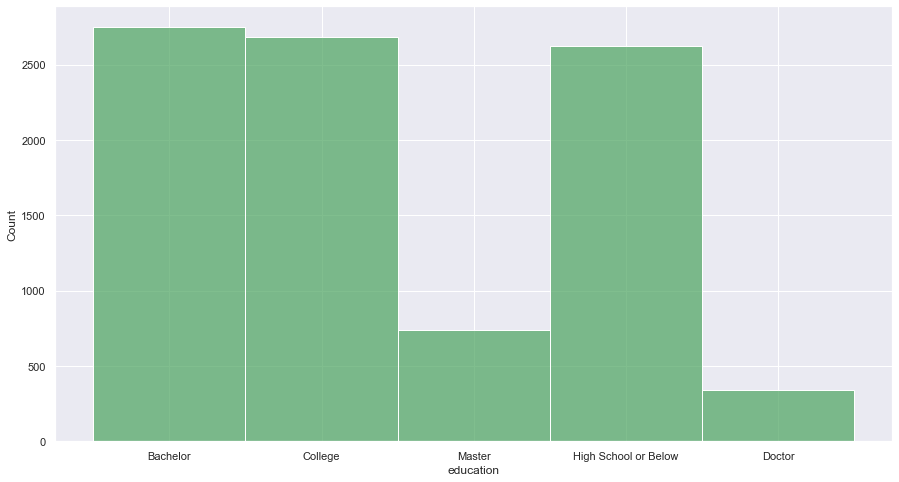

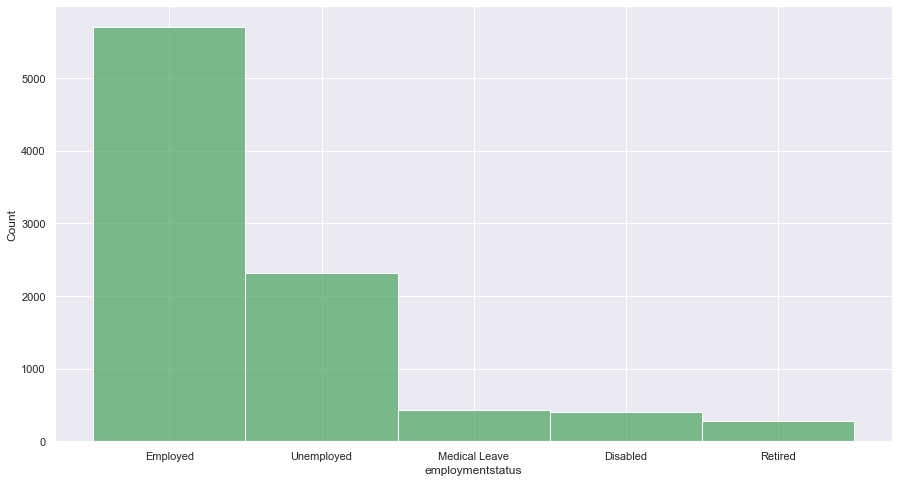

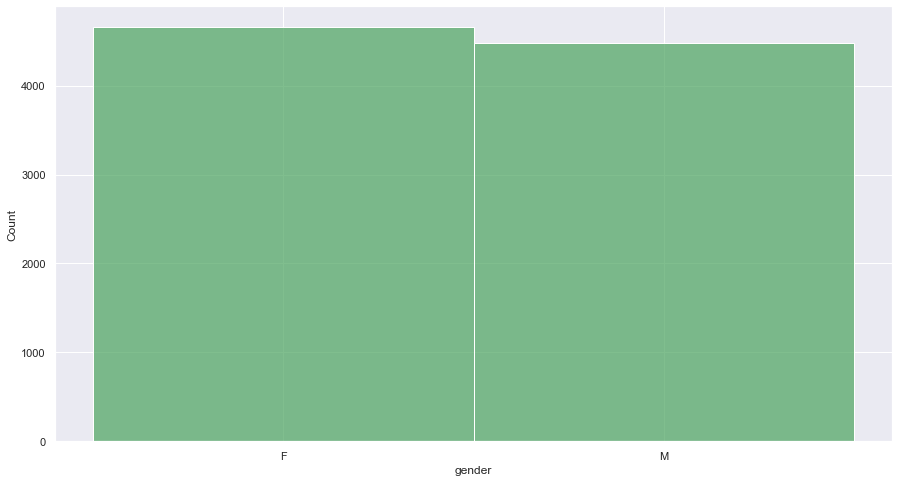

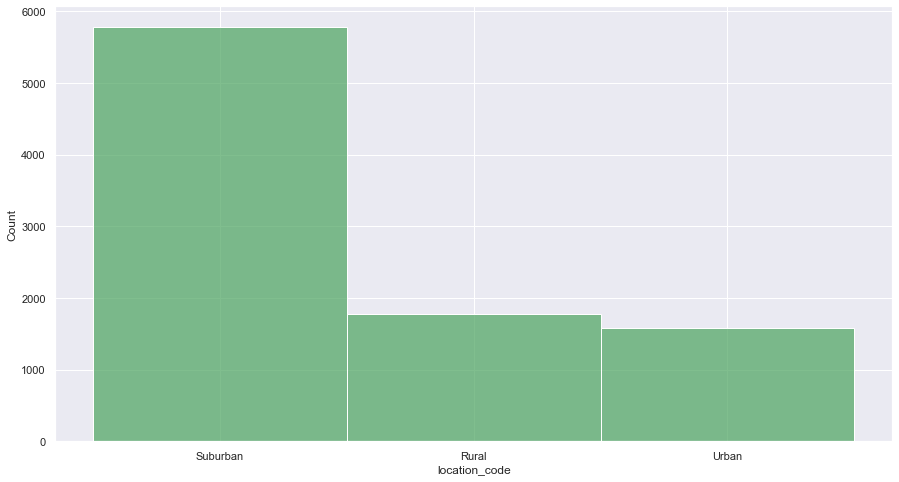

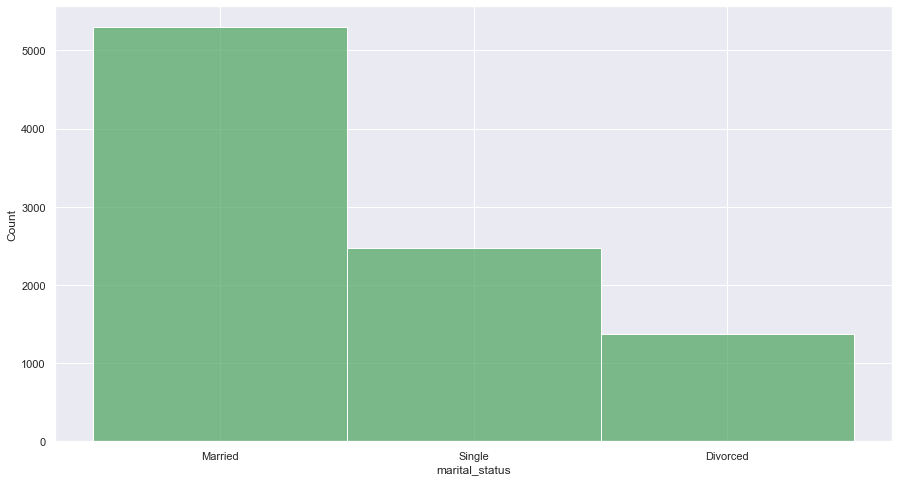

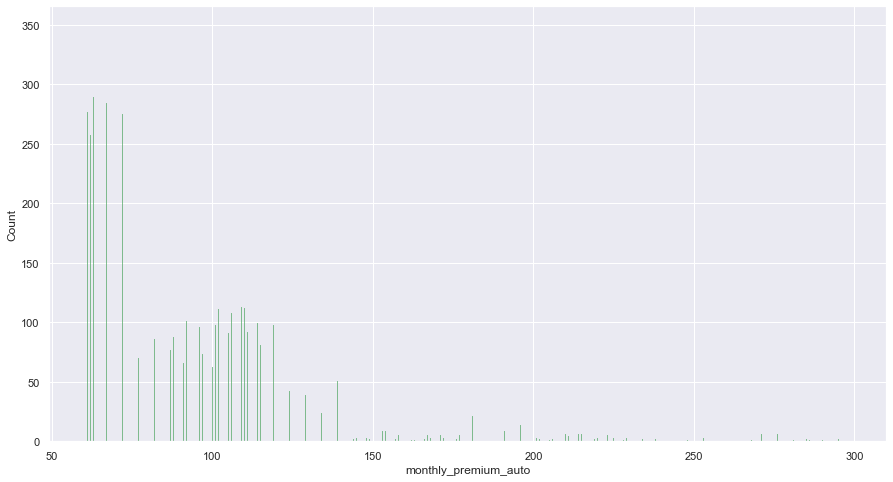

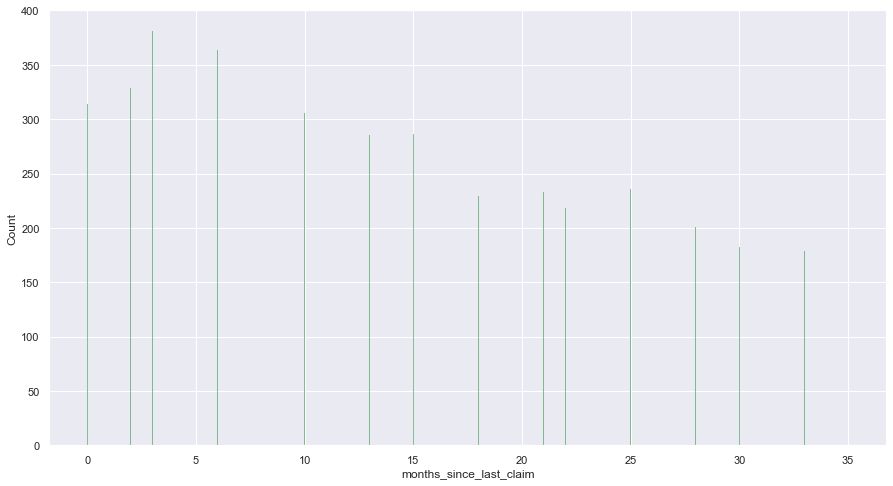

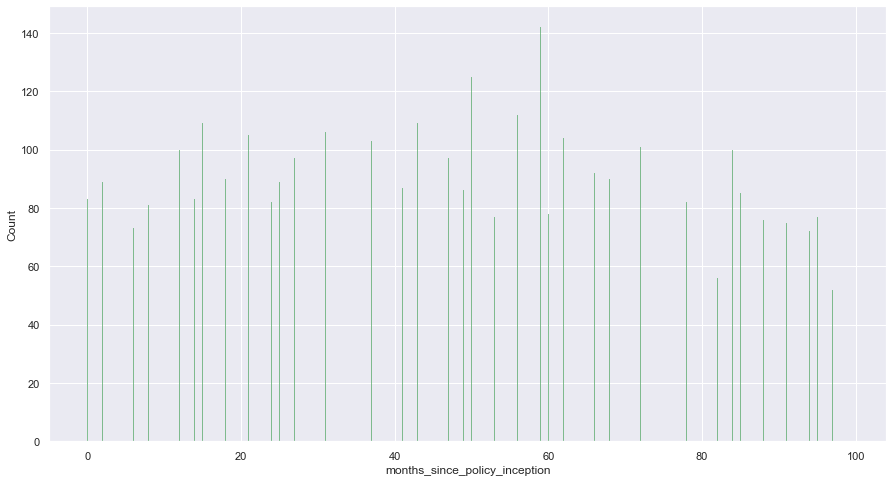

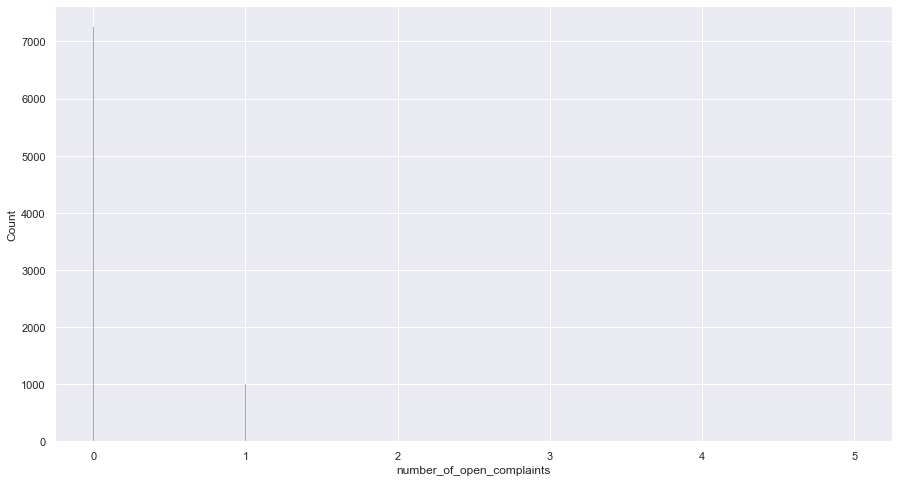

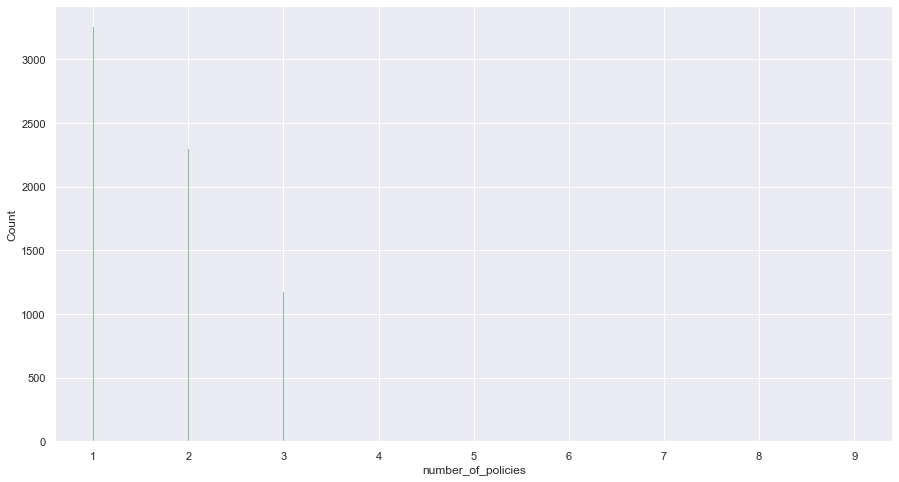

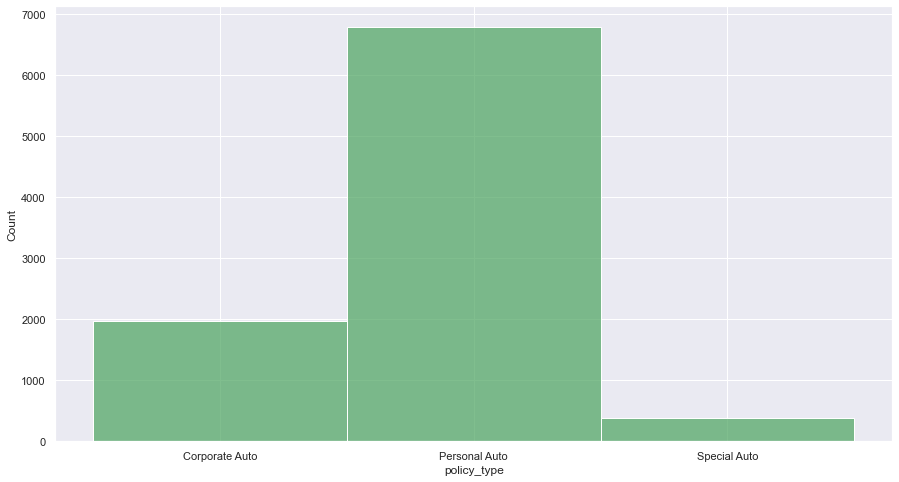

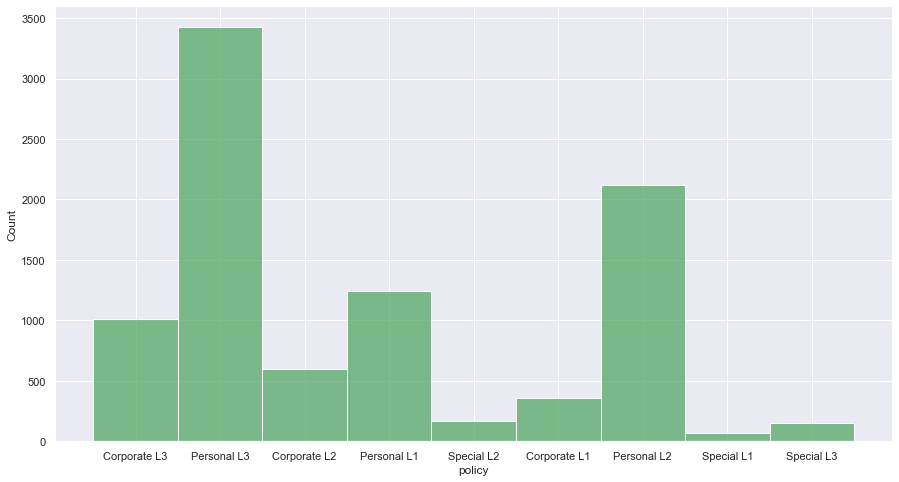

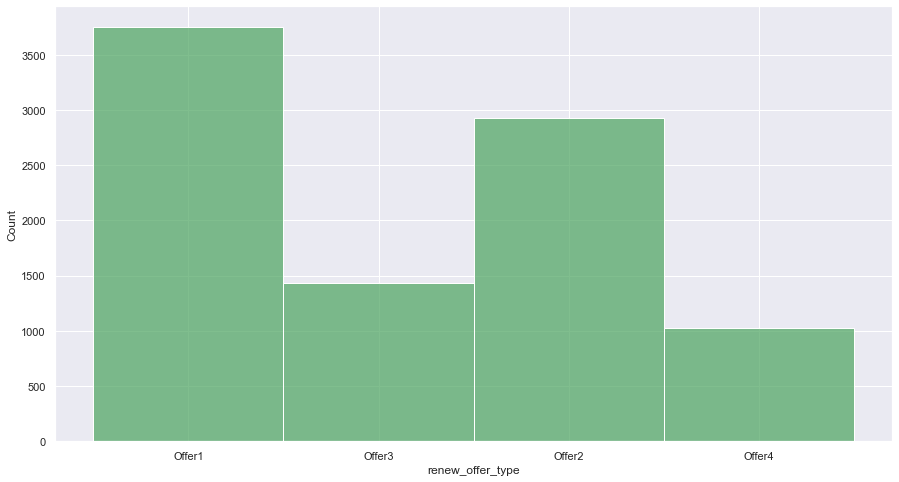

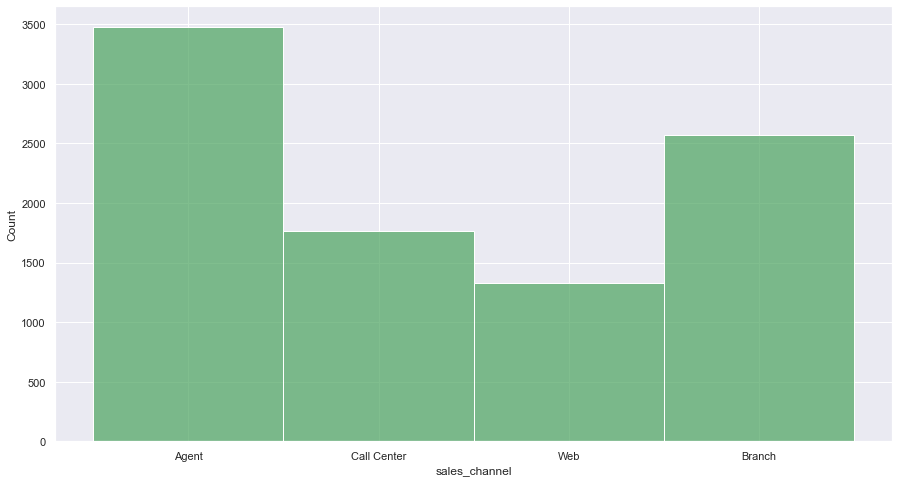

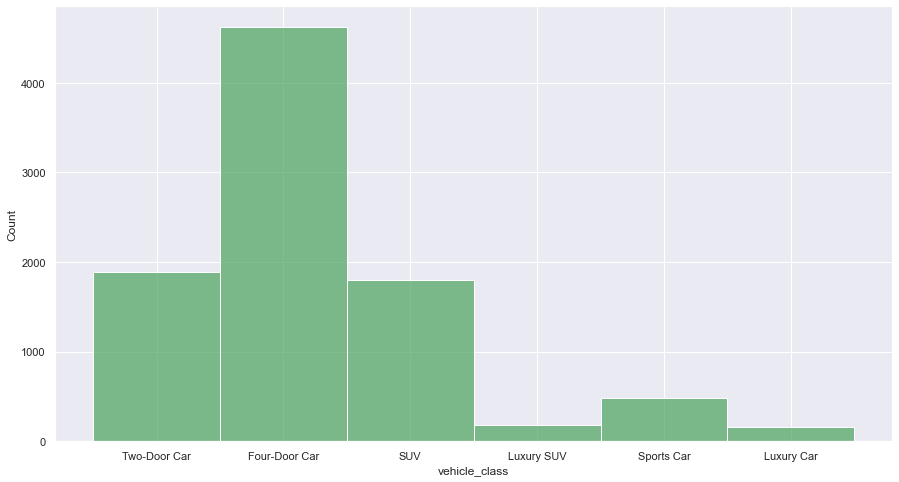

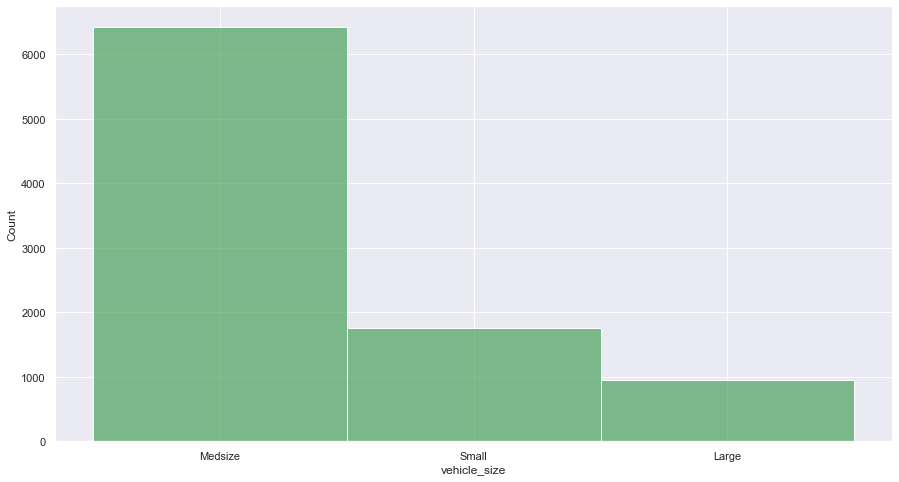

In [15]:
plot_discrete(discrete_df1)

In [16]:
continuous_df1=continuous_df.drop(['customer'], axis=1)

In [17]:
# plot for continuous variables with distribution plot
def plot_continuous(x):
    for col in continuous_df1:
        sns.distplot(continuous_df1[col], bins=60)
        plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


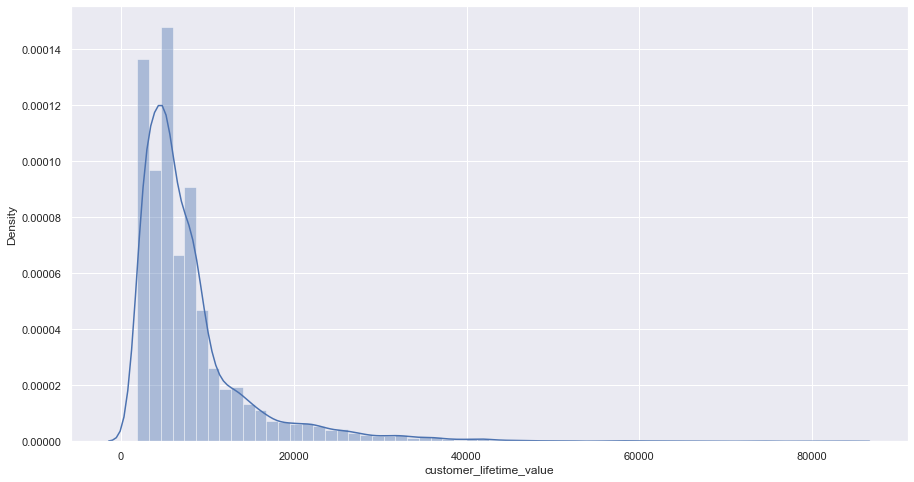

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


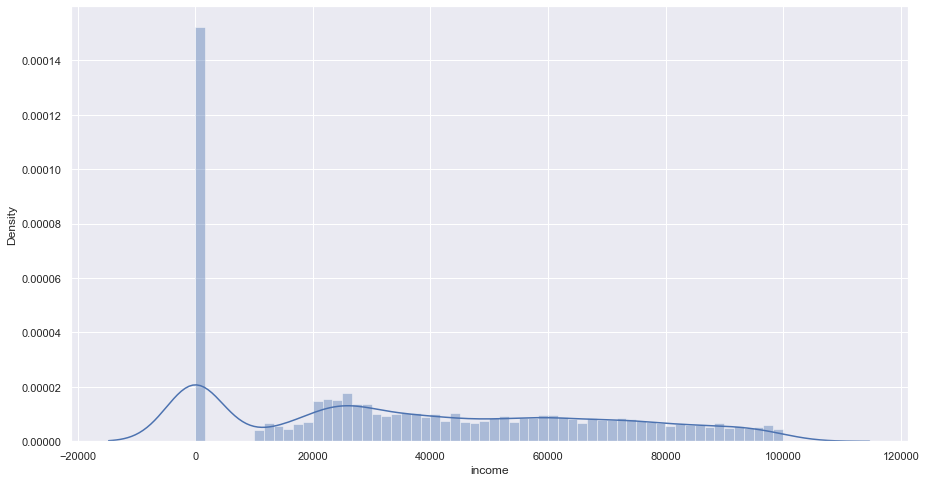

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


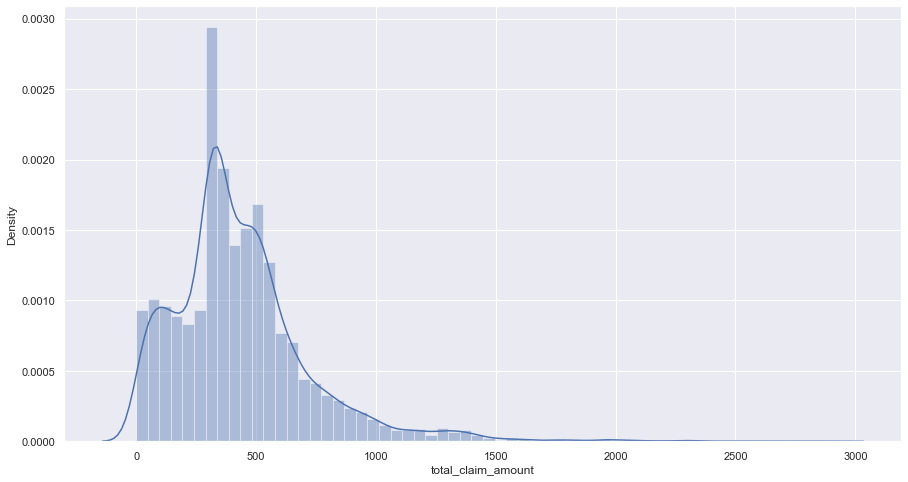

In [18]:
plot_continuous(continuous_df1)

## 5. What can you see in the plots?

In [19]:
# in the plots of discrete variables we can see every value that the variable has. The plots contain both categorical 
# and numerical (integer numbers) features
# in the plots of continuous variables we can see only numerical features. We can also notice that
# the distributions are skewed and have some outliers
# some features like income or customer_lifetime_value have a lot of 0 values

## 6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


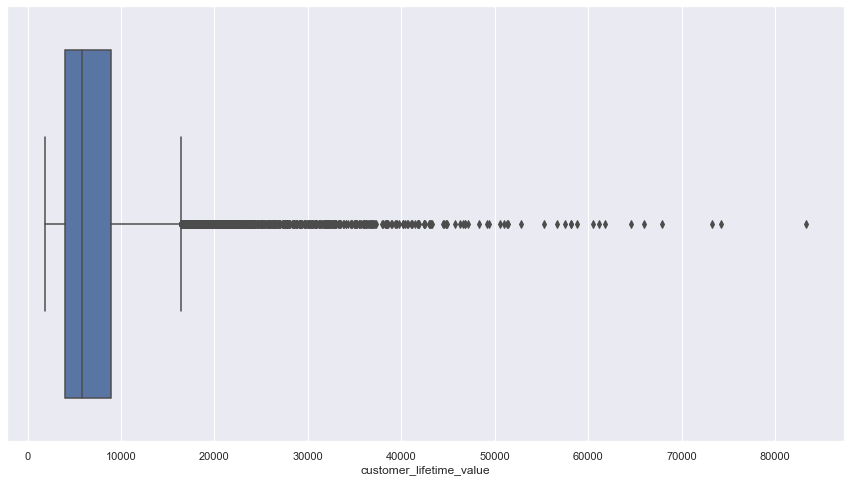

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


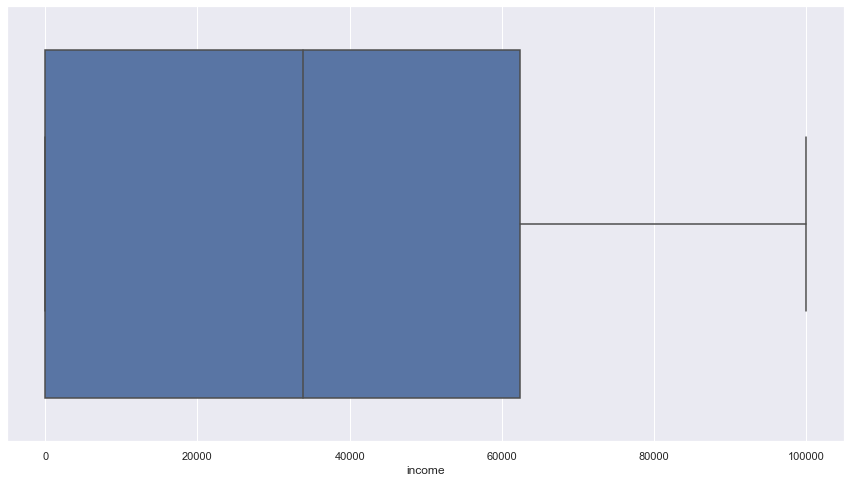

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


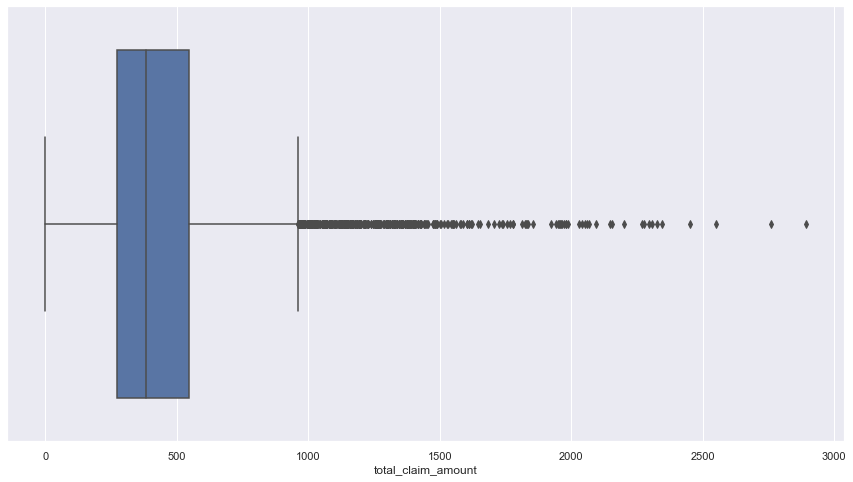

In [20]:
# Let's check in detail the outliers in the continuous variables. The best plot to find outliers in continuous variables
# is boxplot, so
for col in continuous_df1:
    sns.boxplot(continuous_df1[col])
    plt.show()

## 7. Have you found outliers? If you have, what should we do with them?

In [21]:
# what we suspected was true, there are a lot of outliers especially in the columns:
# customer_lifetime_value and total_claim_amount
# there are two main approaches we can use, we can scale these features, we can filter these features and drop some outliers,
# we can also use combination of the above approaches

## 8. Check nan values per column.

In [22]:
 # we have already solve questions 8-12 in the previous lab

In [23]:
customer_df.isna().sum()
# there are no NaN values in the columns

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [24]:
# shows the percentage of null values in a column
nan_df = pd.DataFrame(round(customer_df.isna().sum()/len(customer_df),4)*100)
nan_df
# or 
# nulls = pd.DataFrame(customer_df.isna().sum()*100/len(customer_df), columns=['percentage'])
# nulls.sort_values('percentage', ascending = False)

,0
customer,0.0
state,0.0
customer_lifetime_value,0.0
response,0.0
coverage,0.0
education,0.0
effective_to_date,0.0
employmentstatus,0.0
gender,0.0
income,0.0


## 9. Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [25]:
# define the function. We use the random number 350 to filter each column and to compare the number of the unique values
# with the number 350
def variable(x):
    lst_cont=[]
    lst_disc=[]
    for i in x:
        if len(x[i].unique())>350:
            lst_cont.append(i)
        else:
            lst_disc.append(i)
    return x[lst_cont], x[lst_disc] 

In [26]:
# seperating continuous, discrete 
continuous_df, discrete_df = variable(customer_df)

In [27]:
# continuous stored
continuous_df

,customer,customer_lifetime_value,income,total_claim_amount
0,BU79786,2763.519279,56274,384.811147
1,QZ44356,6979.535903,0,1131.464935
2,AI49188,12887.431650,48767,566.472247
3,WW63253,7645.861827,0,529.881344
4,HB64268,2813.692575,43836,138.130879
...,...,...,...,...
9129,LA72316,23405.987980,71941,198.234764
9130,PK87824,3096.511217,21604,379.200000
9131,TD14365,8163.890428,0,790.784983
9132,UP19263,7524.442436,21941,691.200000


In [28]:
# discrete stored
discrete_df

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


## 10. for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [29]:
df_categorical = customer_df.select_dtypes(include=['object'])
df_categorical

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [30]:
# define the function. We use the random number 50 to filter each column and to compare the number of the unique values
# with the number 50
def text(x):
    lst_text=[]
    for i in x:
        if len(x[i].unique())>50:
            lst_text.append(i)
        else:
            break
    return x[lst_text]

In [31]:
# Let's check whether we have kind of text in a variable
lst_text1 = text(df_categorical)
lst_text1
# we have in the column customer

,customer
0,BU79786
1,QZ44356
2,AI49188
3,WW63253
4,HB64268
...,...
9129,LA72316
9130,PK87824
9131,TD14365
9132,UP19263


In [32]:
# we act accordingly in the 12th question

## 11. Get categorical features.

In [33]:
for col in customer_df.select_dtypes('object'):
    print(customer_df[col].value_counts(), '\n')

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64 

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 

No     7826
Yes    1308
Name: response, dtype: int64 

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64 

1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157


In [34]:
# Let's make a Chi-square test, which is used to determine if there is a significant relationship between two categorical variables.
# The test is based on a contingency table. The frequency of categories in a variable is compared
# to the frequencies of categories in another variable.contingency table
# we will use for instance the categorical columns 'response' and 'gender'
data_crosstab = pd.crosstab(customer_df['response'], customer_df['gender'], margins=True)
data_crosstab

gender,F,M,All
response,,,
No,3998,3828,7826
Yes,660,648,1308
All,4658,4476,9134


In [35]:
from scipy.stats import chi2_contingency

stats, p_value, dof, frequencies = chi2_contingency(data_crosstab)
p_value
# the result is a low p_value (> 0.05), so we cannot assume relationship between the variables

0.9963264483865205

## 12. What should we do with the customer id column?

In [36]:
# there is no customer_id column but if we use instead of customer_id column the customer column, 
# we can use in every row the first 4 letters or numbers
customer_df['customer'] = customer_df['customer'].apply(lambda x: x[0]+x[1]+x[2]+x[3])
customer_df['customer']

0       BU79
1       QZ44
2       AI49
3       WW63
4       HB64
        ... 
9129    LA72
9130    PK87
9131    TD14
9132    UP19
9133    Y167
Name: customer, Length: 9134, dtype: object

In [37]:
# there is no customer_id column but if we use instead of customer_id column the customer column, we can just convert it to index
# as the info it give us is useful
customer_df = customer_df.set_index('customer')
customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,
BU79,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


# lab-feature-extraction

In [38]:
# For this lab, we will be using the same dataset we used in the previous labs.
# We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

## 1. Open the categoricals variable we created before.

In [39]:
df_categorical = customer_df.select_dtypes(include=['object'])
df_categorical

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,
BU79,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


## 2. Plot all the categorical variables with the proper plot. What can you see?

In [40]:
# let's define the total_claim_amount as the target and we will find the boxplots and countplots of each categorical variable
# we can also use barplots
def plot_categorical (x):
    for col in x:
        if (col!='total_claim_amount'):
            sns.boxplot(x=customer_df[col], y='total_claim_amount', data=customer_df)
            plt.show()
            sns.countplot(x=col, data = customer_df)
            plt.show()
        else:
            break

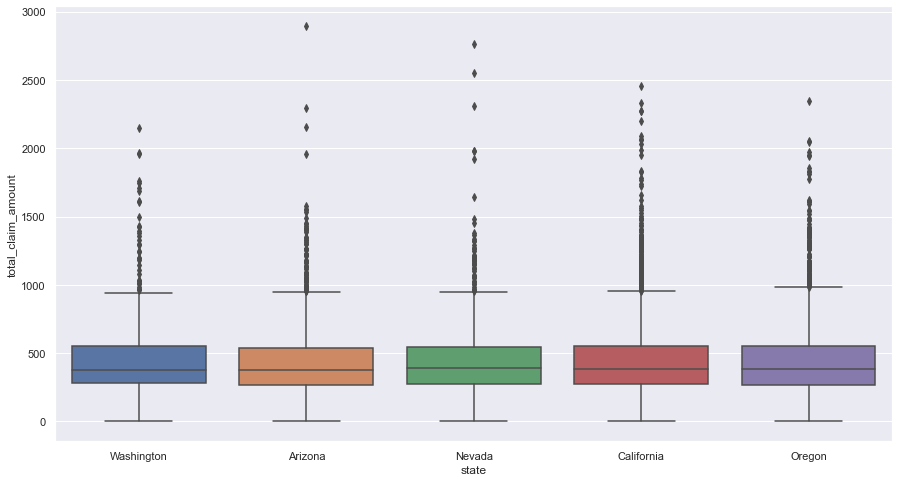

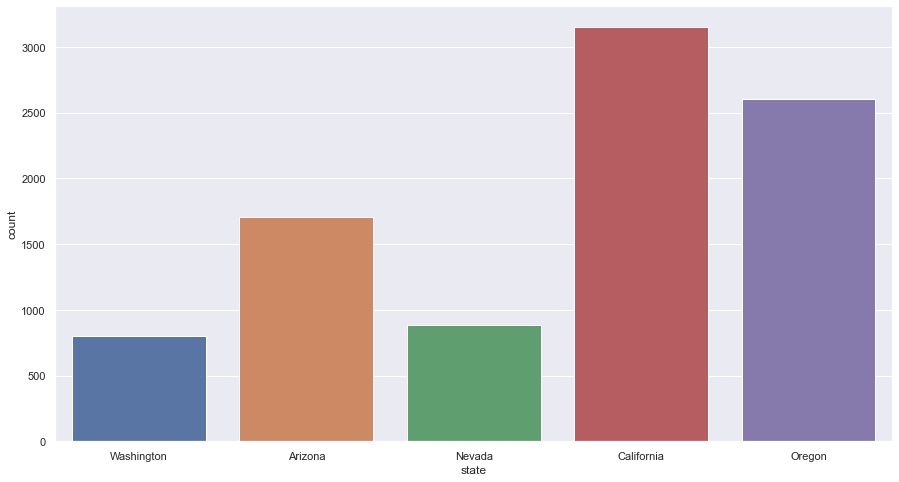

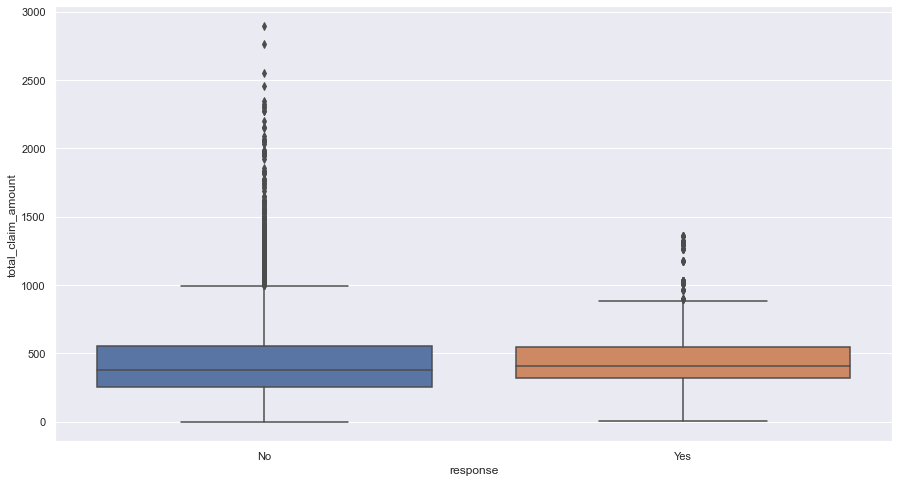

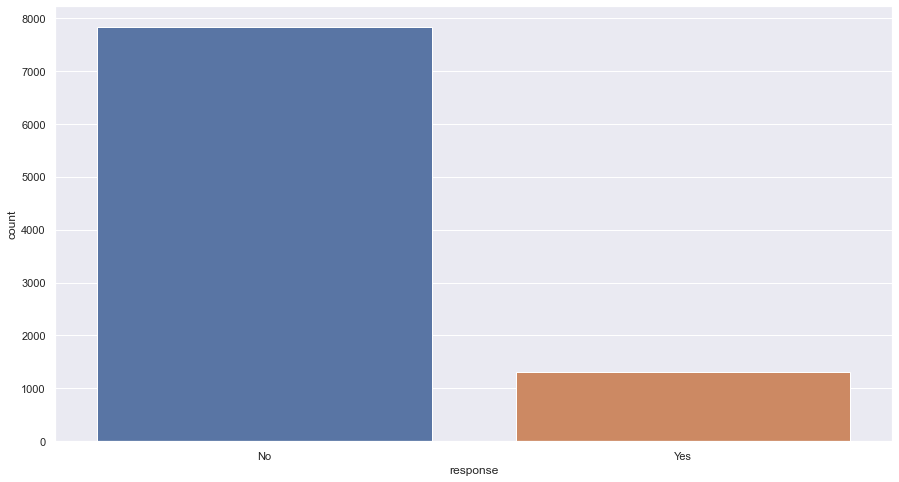

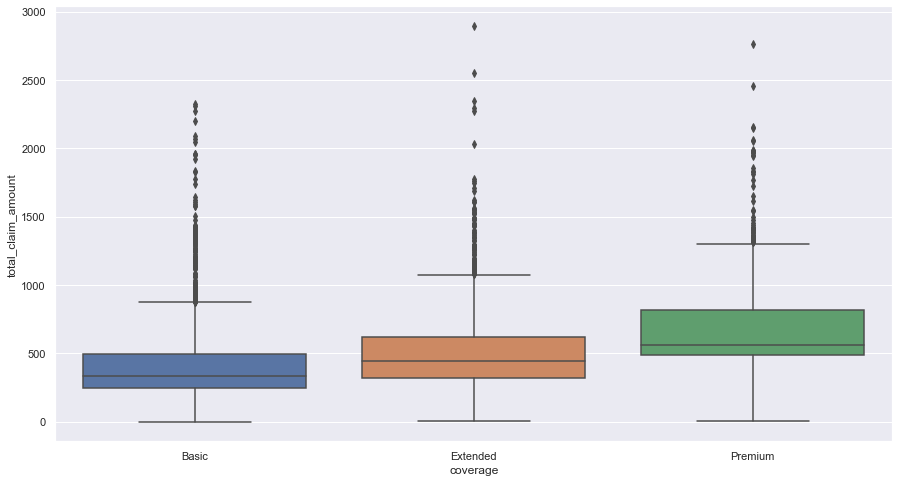

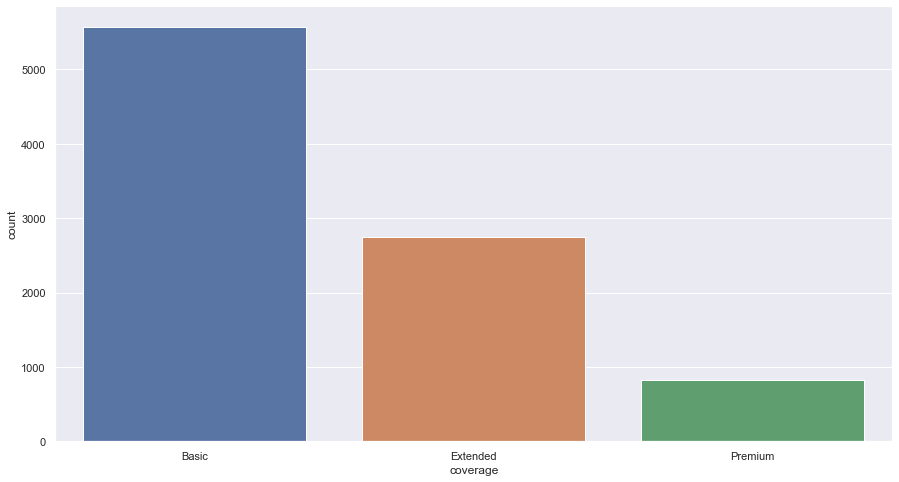

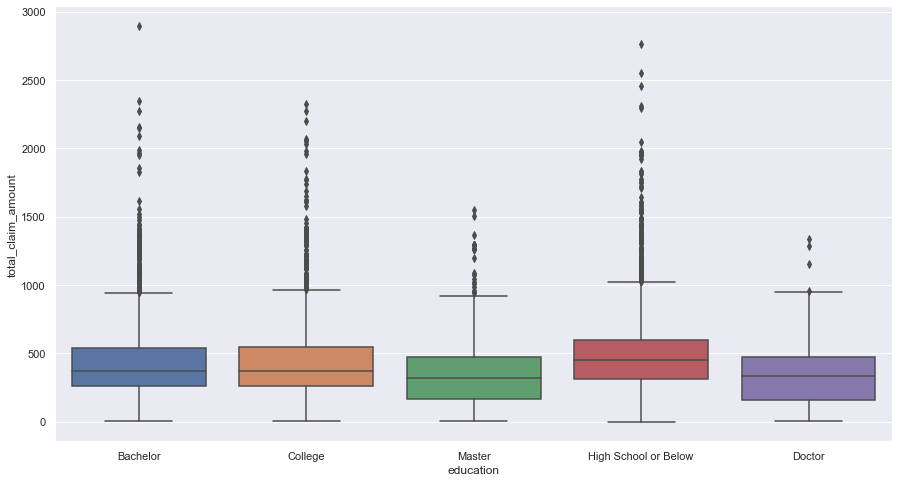

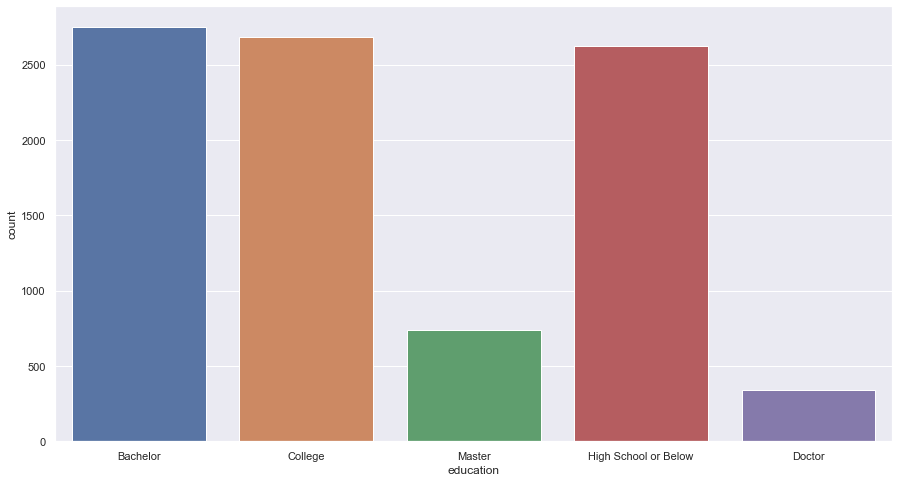

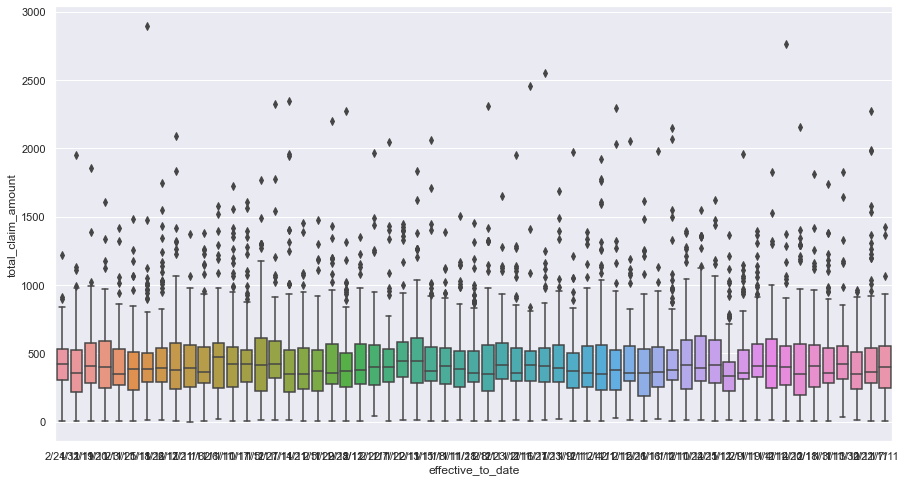

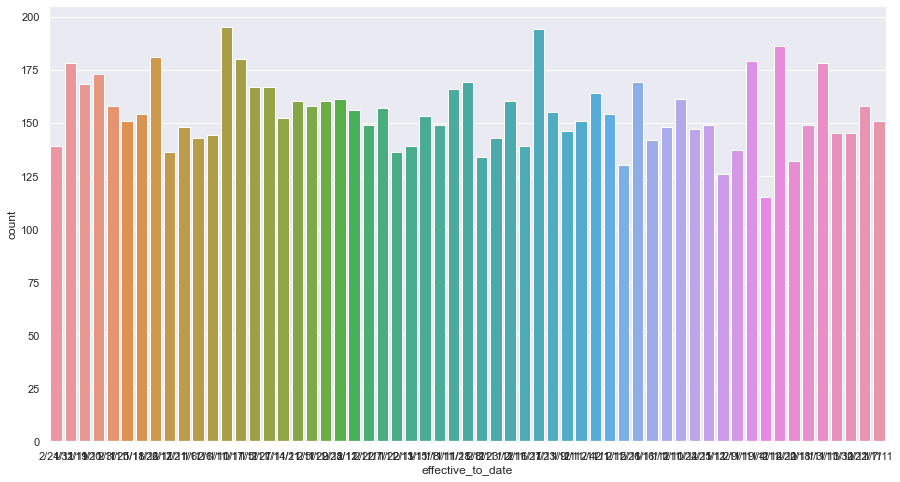

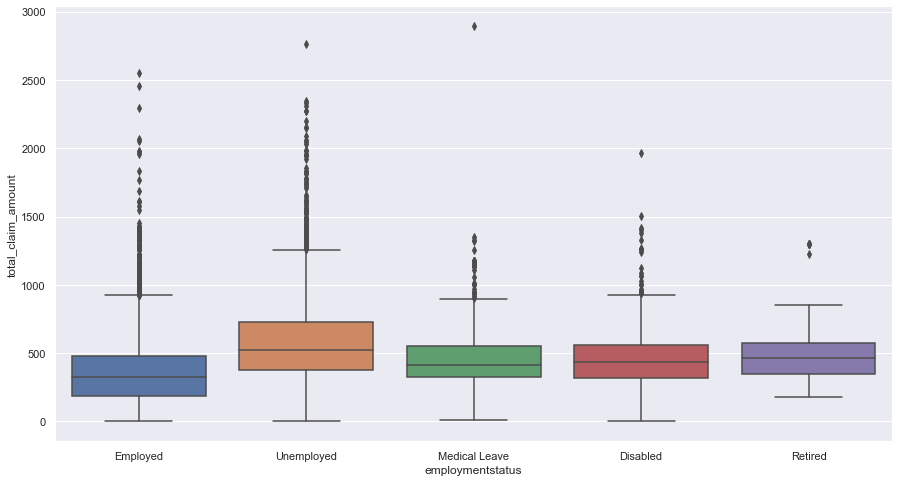

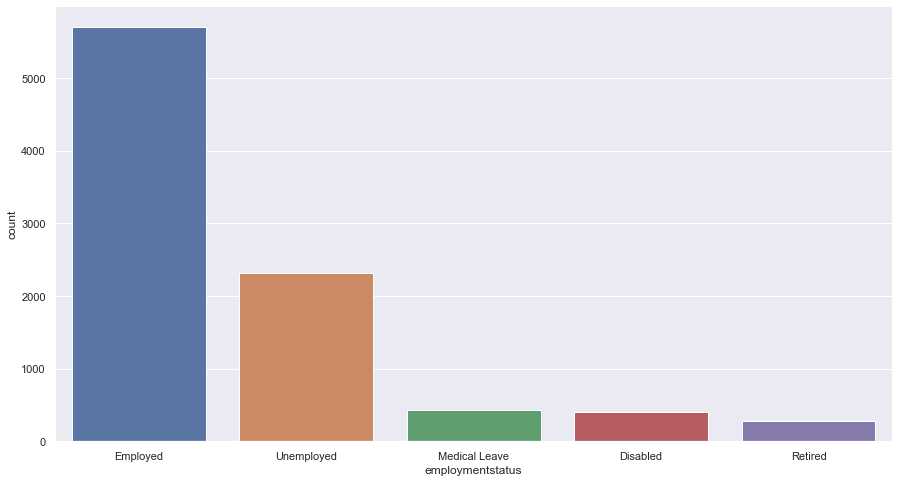

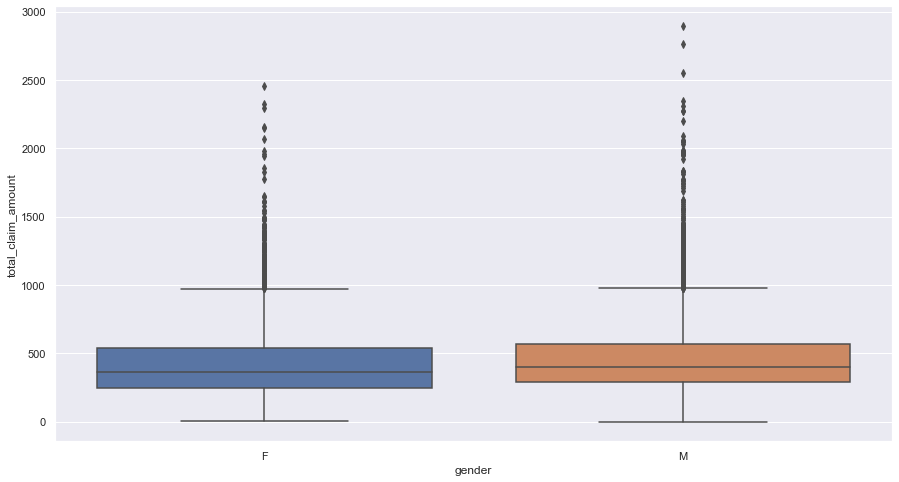

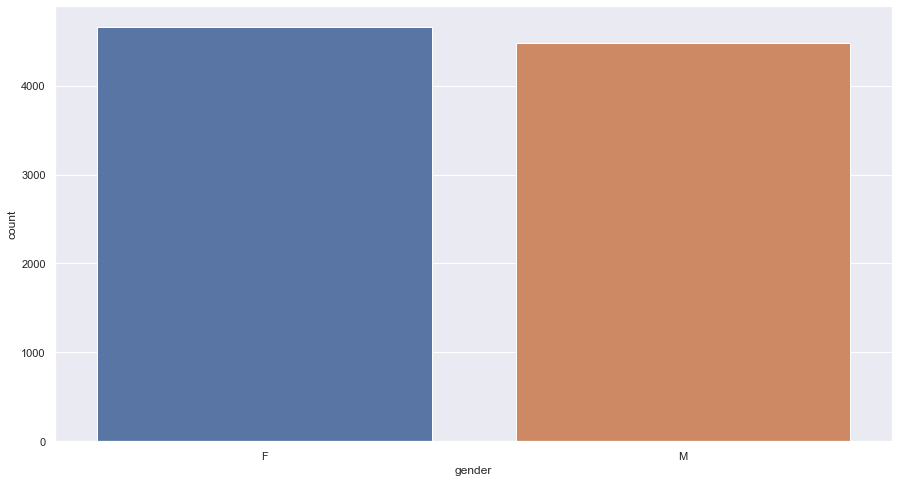

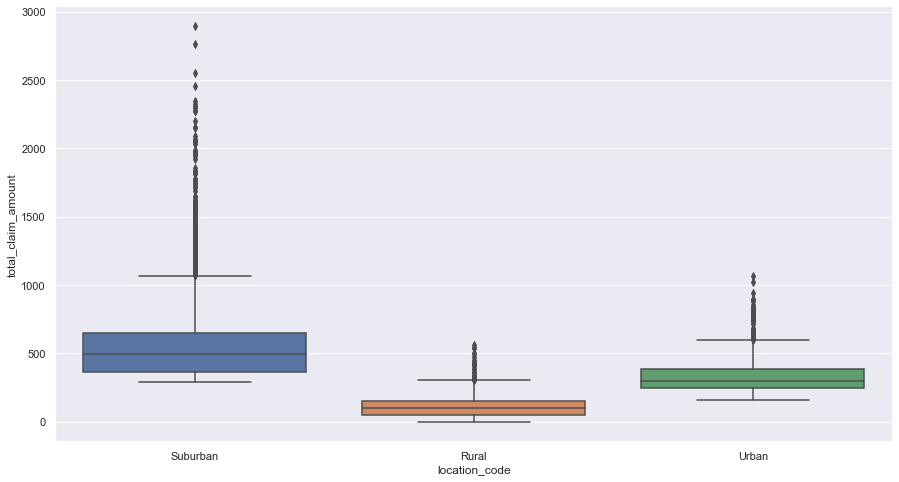

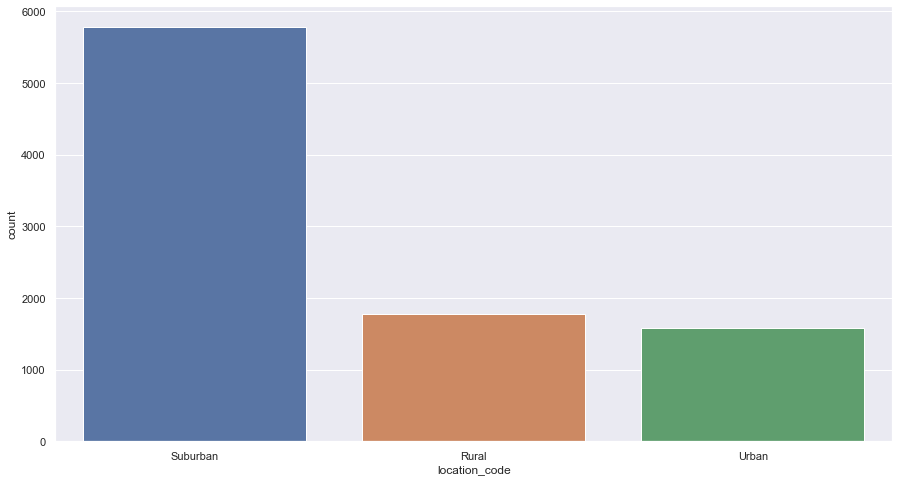

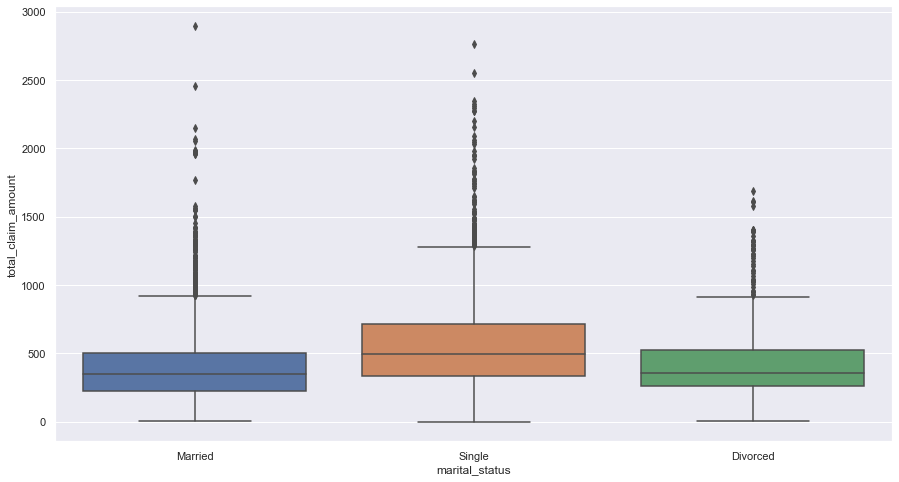

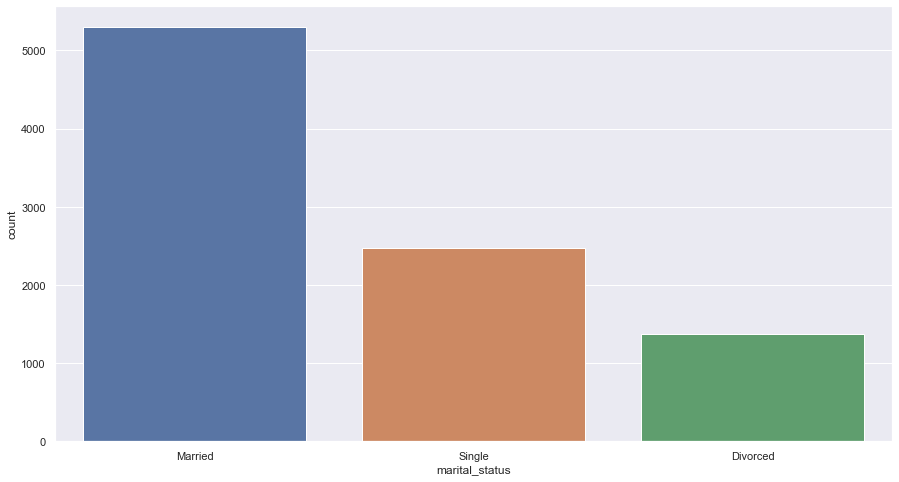

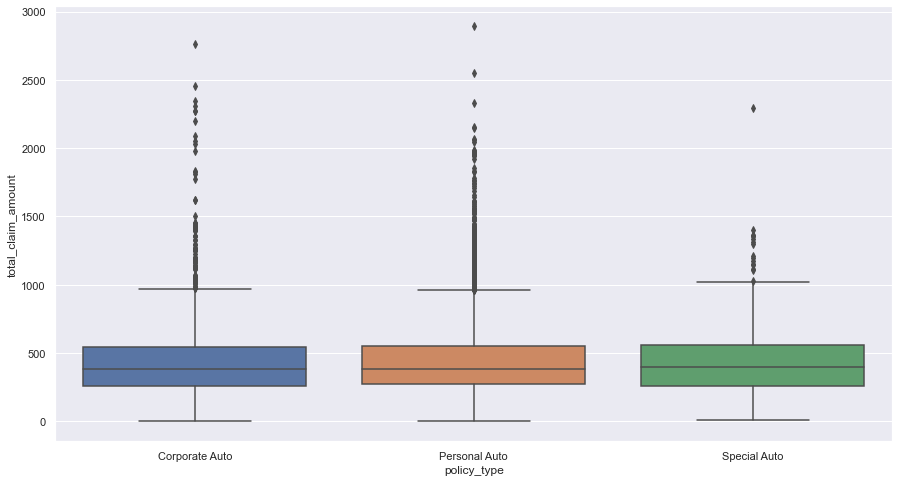

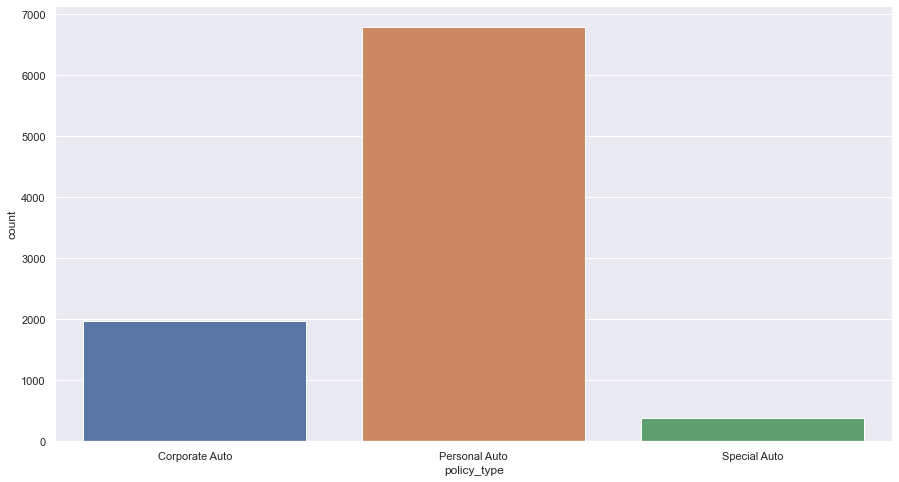

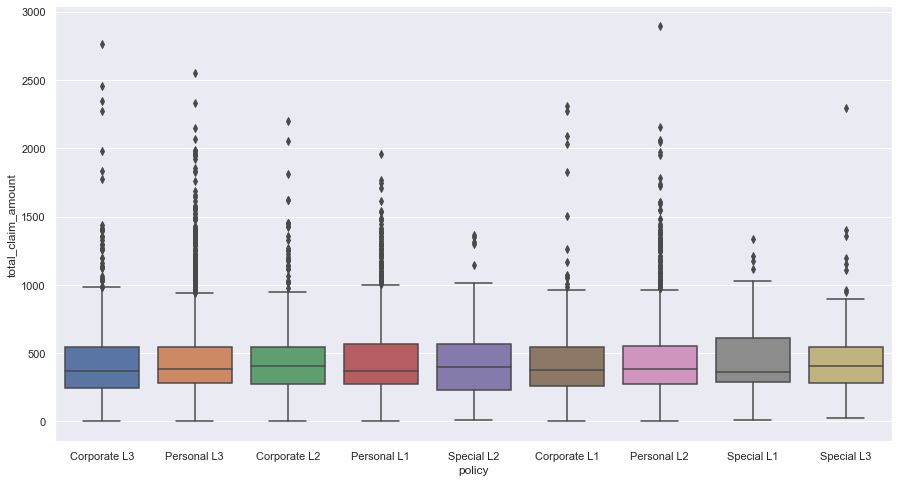

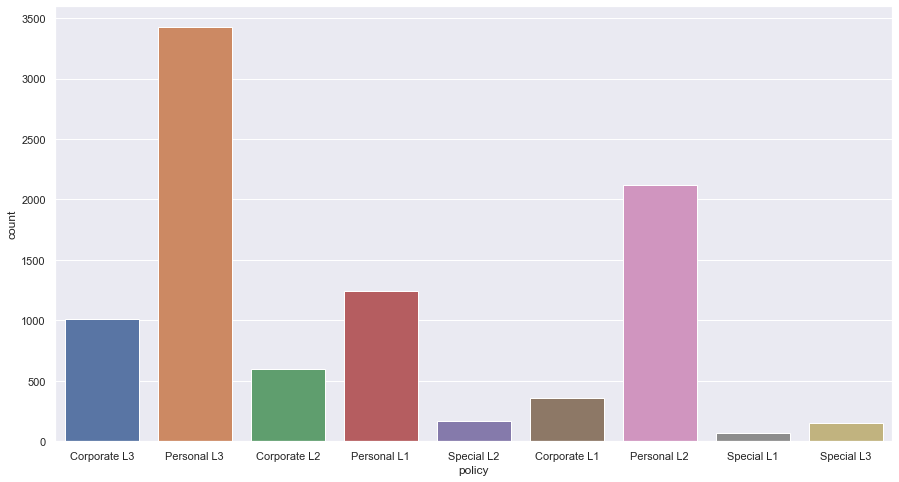

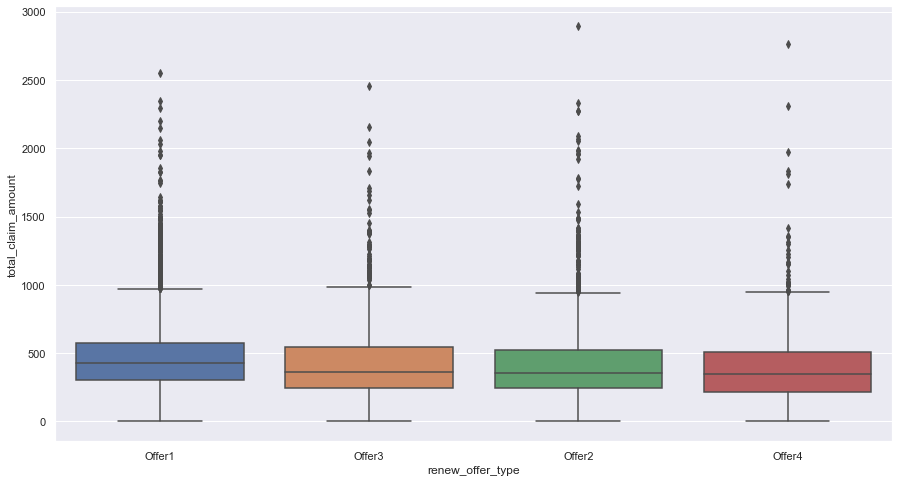

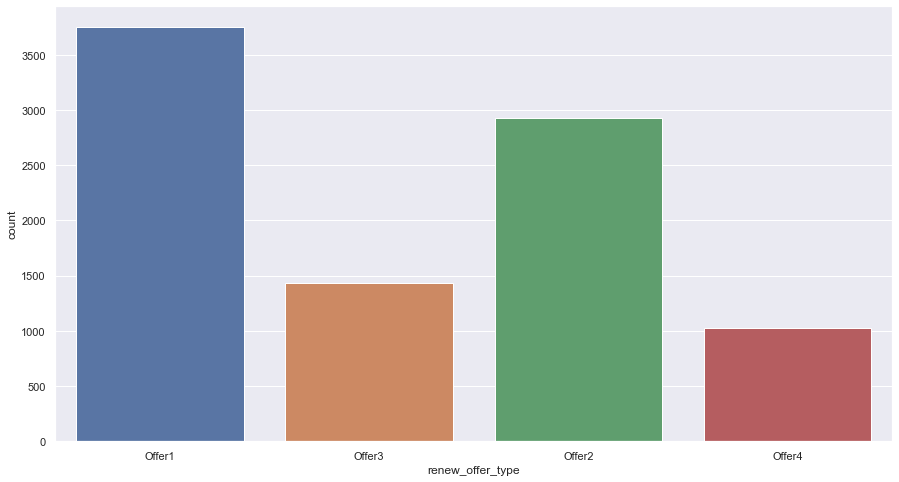

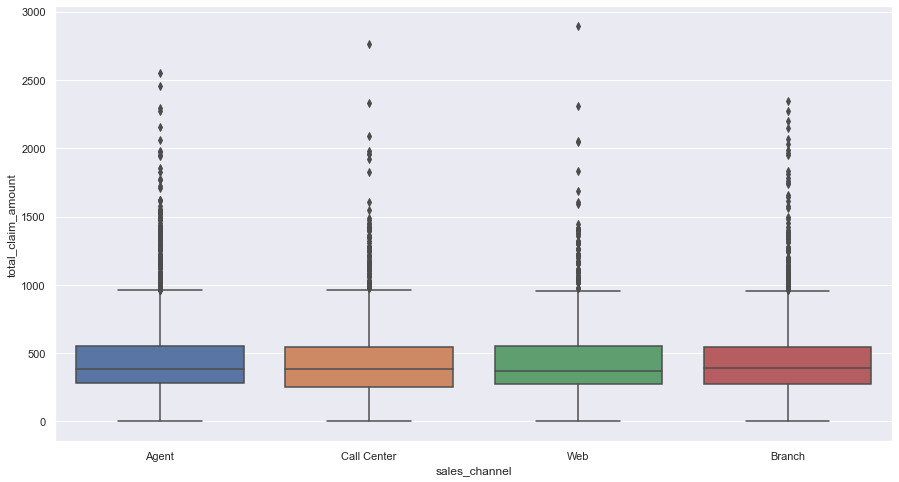

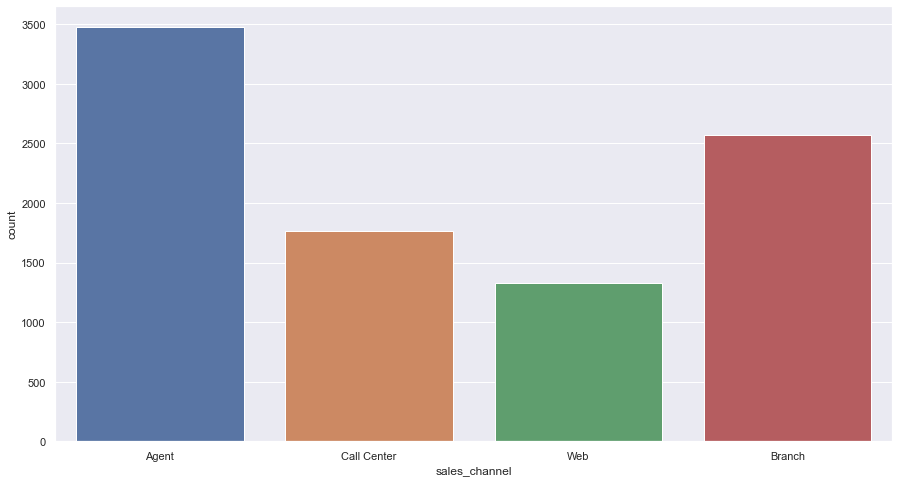

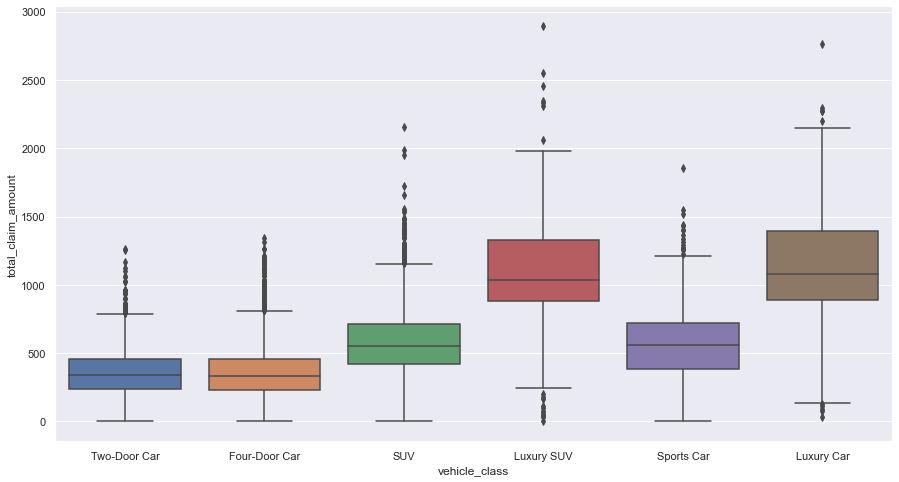

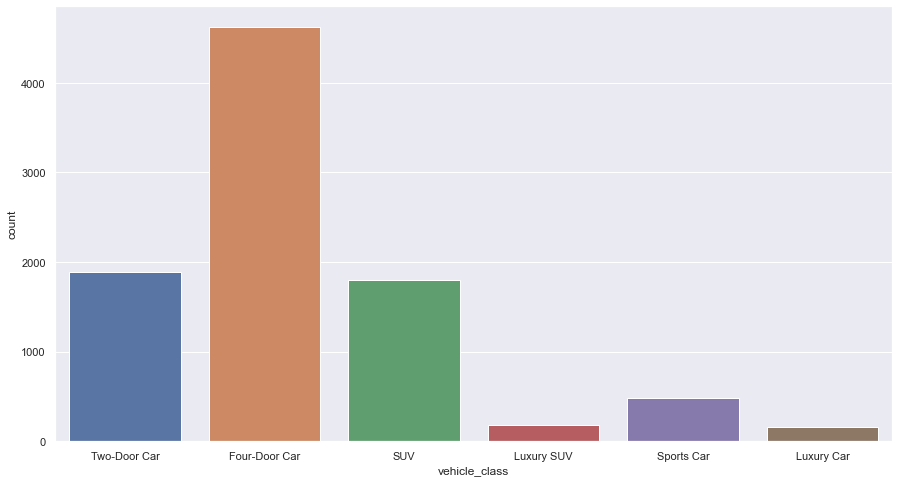

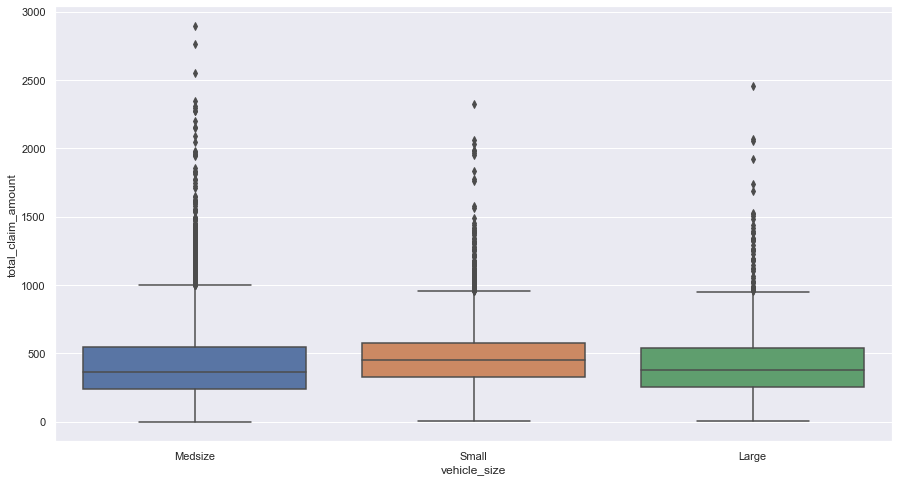

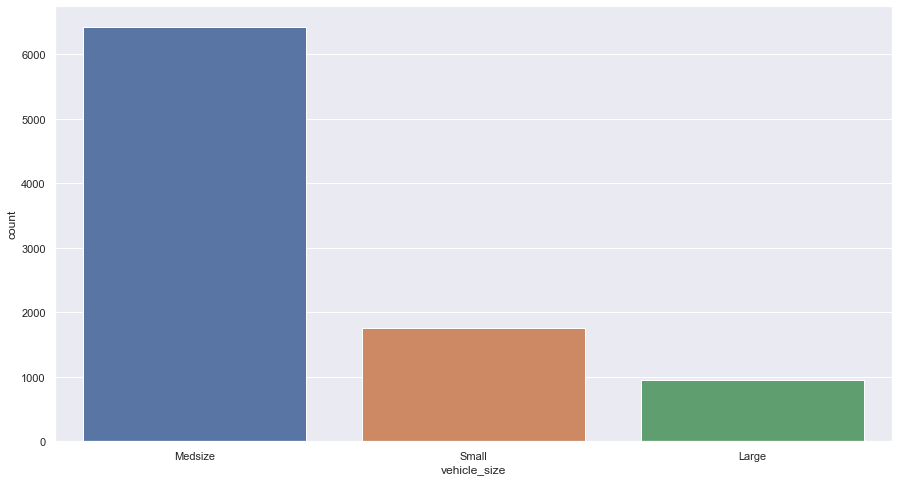

In [41]:
plot_categorical(df_categorical)

In [42]:
# we can notice that there are a lot of observations on the states of California and Oregon.
# We have a lot of no responses. Most people prefer the basic coverage.
# Majority's education level is till Bachelor degree, are employed, are females, live in suburb areas, are married,
# have personal auto which is a four door car and medsize. Most sales (sales chanel) come from agents.
# We also have a lot of ouliers in many variables

## 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [43]:
# We can change the column 'customer', now we just have unuseful information. We have unique values but we can just use them as indexes.
# if the column was not index we can use
# customer_df['customer'].value_counts() to check values

# effective_to_date has also unique values and there is no effect from this column in the others, is independent
# customer_df['effective_to_date'].value_counts()

In [44]:
# the columns vehicle_size and vehicle_class seems to be redundant, let's check it.
# We will make a Chi-square test, which is used to determine if there is a significant relationship between the 2 features
data_crosstab1 = pd.crosstab(customer_df['vehicle_size'], customer_df['vehicle_class'], margins = False)
data_crosstab1

vehicle_class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
vehicle_size,,,,,,
Large,475,16,18,167,49,221
Medsize,3237,106,125,1308,366,1282
Small,909,41,41,321,69,383


In [45]:
from scipy.stats import chi2_contingency

stats, p_value, dof, frequencies = chi2_contingency(data_crosstab1)
print('p value is:',p_value)

# the result is a low p_value ( < 0.05), so we can assume a significant relationship between the variables

p value is: 0.006024951458906959


In [46]:
# Let's make the same for the features policy and policy_type
data_crosstab2 = pd.crosstab(customer_df['policy'], customer_df['policy_type'], margins = False)
data_crosstab2

policy_type,Corporate Auto,Personal Auto,Special Auto
policy,,,
Corporate L1,359,0,0
Corporate L2,595,0,0
Corporate L3,1014,0,0
Personal L1,0,1240,0
Personal L2,0,2122,0
Personal L3,0,3426,0
Special L1,0,0,66
Special L2,0,0,164
Special L3,0,0,148


In [47]:
stats, p_value, dof, frequencies = chi2_contingency(data_crosstab2)
print('p value is:',p_value)

# the result is a low p_value ( < 0.05), so we can assume a significant relationship between the variables

p value is: 0.0


In [48]:
# we might remove one of them if we have high correlation

## 4. Plot time variable. Can you extract something from it?

In [49]:
# Let's create a new column called month and extracting the month
df_categorical['month'] = pd.DatetimeIndex(df_categorical['effective_to_date']).month
df_categorical['month'] 

C:\Users\Admin\AppData\Local\Temp/ipykernel_11964/1859998889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['month'] = pd.DatetimeIndex(df_categorical['effective_to_date']).month


customer
BU79    2
QZ44    1
AI49    2
WW63    1
HB64    2
       ..
LA72    2
PK87    2
TD14    2
UP19    2
Y167    2
Name: month, Length: 9134, dtype: int64

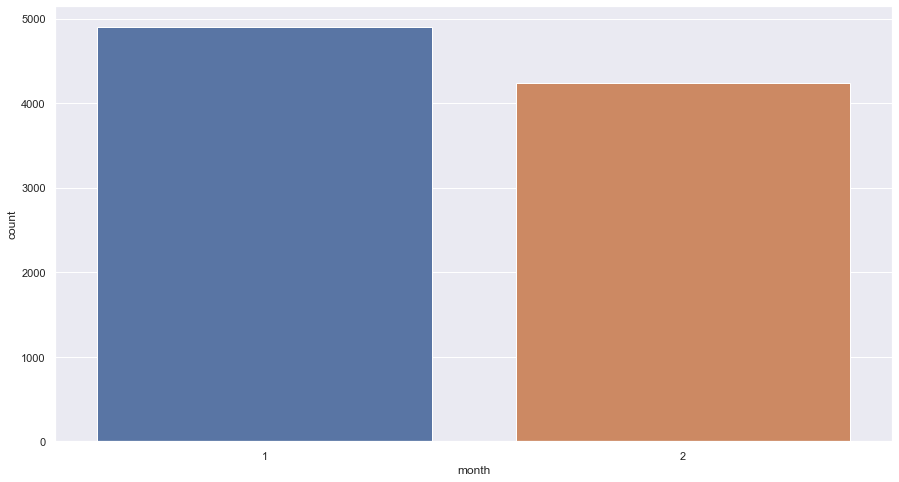

In [50]:
# plot the countplot
sns.countplot(x='month', data=df_categorical)
plt.show()

In [51]:
# we just extract the month of the column effective_to_date and the majority of the observations are in the first month
# (could be January)
# if we consider total_claim_amount as the target, then we cannot notice any relationship with the column and the target value

# Lab | Data cleaning and wrangling

In [52]:
# For this lab, we will be using the same dataset we used in the previous labs.
# We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

In [53]:
# So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

## 1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [54]:
customer_df.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


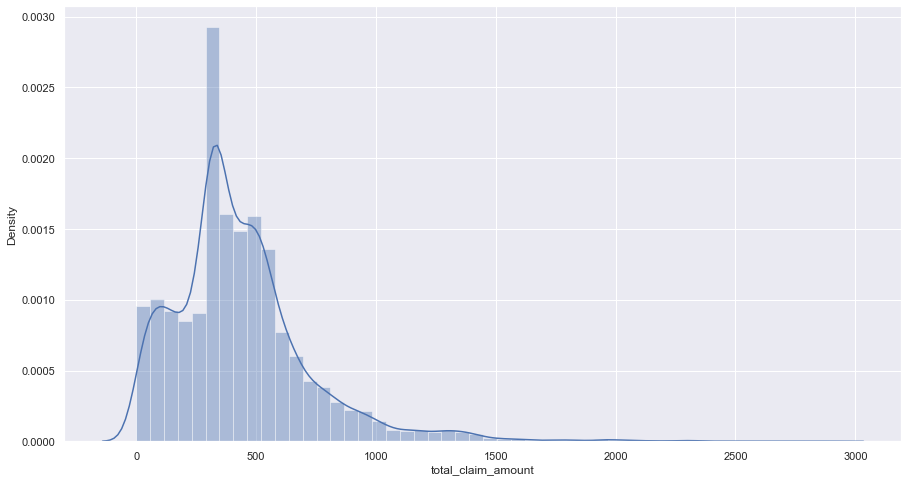

In [55]:
# we define that total_claim_amount is the target value, let's check its outliers
sns.distplot(customer_df['total_claim_amount'])
plt.show()
# the distribution is a little bit skewed

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_claim_amount'>

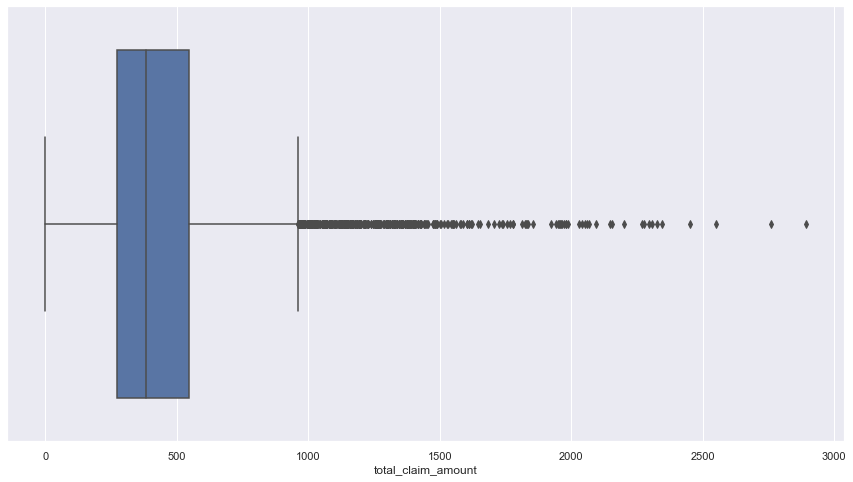

In [56]:
sns.boxplot(customer_df['total_claim_amount'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


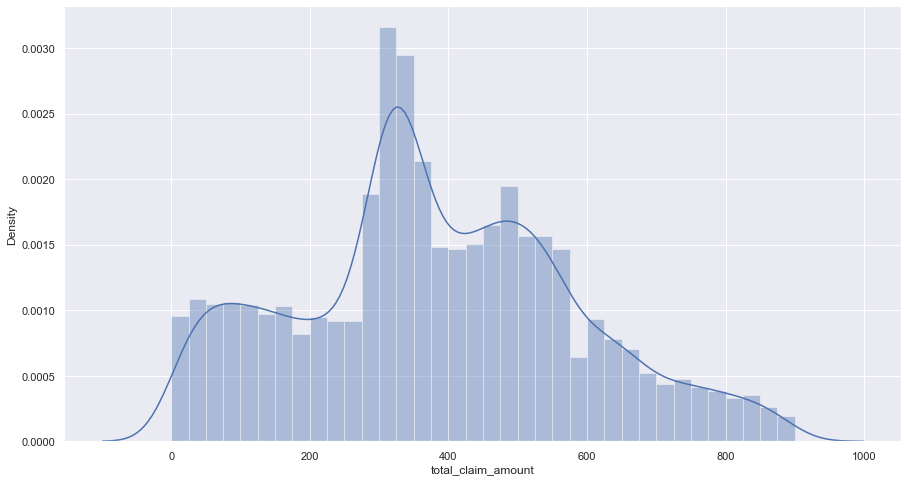

In [57]:
customer_df_total_claim_amount=customer_df[customer_df['total_claim_amount'] < 900]
sns.distplot(customer_df_total_claim_amount['total_claim_amount'])
plt.show()

In [58]:
# # apply log transformation since it will make the 'outliers' interval smaller
# def log_transform(x):
#     if np.isfinite(x) and x!=0:
#         return np.log(x)
#     else:
#         return np.NAN

In [59]:
# log_transform(customer_df_total_claim_amount)

## 2. Create a copy of the dataframe for the data wrangling.

In [60]:
customer_df_copy = customer_df.copy()

## 3. Normalize the continuous variables. You can use any one method you want.

In [61]:
# we have already stored continuous variables
continuous_df

,customer,customer_lifetime_value,income,total_claim_amount
0,BU79786,2763.519279,56274,384.811147
1,QZ44356,6979.535903,0,1131.464935
2,AI49188,12887.431650,48767,566.472247
3,WW63253,7645.861827,0,529.881344
4,HB64268,2813.692575,43836,138.130879
...,...,...,...,...
9129,LA72316,23405.987980,71941,198.234764
9130,PK87824,3096.511217,21604,379.200000
9131,TD14365,8163.890428,0,790.784983
9132,UP19263,7524.442436,21941,691.200000


In [62]:
# we will drop the column customer because has letters except numbers
continuous_df1 = continuous_df.drop(['customer'], axis=1)
continuous_df1

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


In [63]:
# Let's use normalization
# For each column, each value is divided by the magnitude of the column. The magnitude is calculated as the euclidean distance.
from sklearn.preprocessing import Normalizer

transformer = Normalizer()
transformer.fit(continuous_df1) # we use only the continuous variables
x_continuous_normalized = transformer.transform(continuous_df1)
x_continuous_normalized

array([[0.04904803, 0.99877307, 0.00682978],
       [0.98711334, 0.        , 0.16002269],
       [0.25547847, 0.96674953, 0.01122966],
       ...,
       [0.99534146, 0.        , 0.0964125 ],
       [0.32425036, 0.94550225, 0.02978584],
       [0.99013542, 0.        , 0.14011367]])

## 4. Encode the categorical variables

In [64]:
# we have already stored categorical variables
df_categorical

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month
customer,,,,,,,,,,,,,,,,
BU79,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2
QZ44,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1
AI49,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2
WW63,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,1
HB64,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,2
PK87,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,2
TD14,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,2


In [65]:
# we will drop the column effective_to_date because has dates, customer column is index
categorical_df1 = df_categorical.drop(['effective_to_date'], axis=1)
categorical_df1

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month
customer,,,,,,,,,,,,,,,
BU79,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2
QZ44,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1
AI49,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2
WW63,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,1
HB64,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,2
PK87,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,2
TD14,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,2


In [66]:
#One Hot/Label Encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(categorical_df1)
encoded = encoder.transform(categorical_df1).toarray()
cols = encoder.get_feature_names(input_features=categorical_df1.columns)
onehot_encoded = pd.DataFrame(encoded, columns=cols)
onehot_encoded#.head()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,month_2
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9130,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9131,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9132,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [67]:
# we have already created a new column called month and extracting the month
# df_categorical['month'] = pd.DatetimeIndex(df_categorical['effective_to_date']).month
df_categorical['month'] 

customer
BU79    2
QZ44    1
AI49    2
WW63    1
HB64    2
       ..
LA72    2
PK87    2
TD14    2
UP19    2
Y167    2
Name: month, Length: 9134, dtype: int64

In [68]:
df_categorical.dtypes
# effective_to_date needs Datetime format

state                object
response             object
coverage             object
education            object
effective_to_date    object
employmentstatus     object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
month                 int64
dtype: object

In [69]:
# Datetime format   
df_categorical['effective_to_date']=pd.to_datetime(df_categorical['effective_to_date'])

C:\Users\Admin\AppData\Local\Temp/ipykernel_11964/3306012868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['effective_to_date']=pd.to_datetime(df_categorical['effective_to_date'])


In [70]:
# Let's do the same with week, convert the days to numbers which are more useful
df_categorical['weekday']=df_categorical['effective_to_date'].dt.dayofweek
df_categorical['weekday']

C:\Users\Admin\AppData\Local\Temp/ipykernel_11964/1167416229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['weekday']=df_categorical['effective_to_date'].dt.dayofweek


customer
BU79    3
QZ44    0
AI49    5
WW63    3
HB64    3
       ..
LA72    3
PK87    5
TD14    6
UP19    3
Y167    0
Name: weekday, Length: 9134, dtype: int64

## 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [71]:
# Let's check every category

In [72]:
# for the encoded categorical variables, everything is numerical 
onehot_encoded.dtypes

state_California                  float64
state_Nevada                      float64
state_Oregon                      float64
state_Washington                  float64
response_Yes                      float64
coverage_Extended                 float64
coverage_Premium                  float64
education_College                 float64
education_Doctor                  float64
education_High School or Below    float64
education_Master                  float64
employmentstatus_Employed         float64
employmentstatus_Medical Leave    float64
employmentstatus_Retired          float64
employmentstatus_Unemployed       float64
gender_M                          float64
location_code_Suburban            float64
location_code_Urban               float64
marital_status_Married            float64
marital_status_Single             float64
policy_type_Personal Auto         float64
policy_type_Special Auto          float64
policy_Corporate L2               float64
policy_Corporate L3               

In [73]:
# for the continuous variables, everything is numerical 
continuous_df1.dtypes

customer_lifetime_value    float64
income                       int64
total_claim_amount         float64
dtype: object

In [74]:
# and of course all the numerical varuables have as type a numerical type
df_numerical.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [75]:
# we have already made the column customer an index so if we run the following code
# type(df_categorical['customer'])
# we will get an error as this column is an index and not dataframe column